# Chapter 4 Scale-free networks

## 4.1 Social network data

In [4]:
import random

import networkx as nx
import numpy as np

In [5]:
def read_graph(filename):
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [6]:
fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

In [9]:
from networkx.algorithms.approximation import  average_clustering
C = average_clustering(fb)
C

0.596

In [15]:
def sample_path_lengths(G, nodes=None, trails=1000):
    if nodes is None:
        nodes = list(G)
    else:
        nodes = list(nodes)

    pairs = np.random.choice(nodes, (trails, 2))
    lengths = [nx.shortest_path_length(G, *pair) for pair in pairs]
    return lengths

In [16]:
def estimate_path_lengths(G, nodes=None, trials=1000):
    return np.mean(sample_path_lengths(G, nodes, trials))

In [18]:
L = estimate_path_lengths(fb)
L

3.701

## 4.2 WS Model

In [19]:
k = int(round(2*m/n))
k

44

In [21]:
lattice = nx.watts_strogatz_graph(n, k, 0)
len(lattice), len(lattice.edges())

(4039, 88858)

In [22]:
C, average_clustering(lattice)

(0.596, 0.729)

In [23]:
L, estimate_path_lengths(lattice)

(3.701, 46.045)

In [24]:
random_graph = nx.watts_strogatz_graph(n, k, 1)

In [25]:
C, average_clustering(random_graph)

(0.596, 0.008)

In [26]:
L, estimate_path_lengths(random_graph)

(3.701, 2.61)

In [27]:
ws = nx.watts_strogatz_graph(n, k, 0.05, seed=15)

In [30]:
C, average_clustering(ws)

(0.596, 0.622)

In [31]:
L, estimate_path_lengths(ws)

(3.701, 3.227)

## 4.3 Degree

In [32]:
def degrees(G):
    return [G.degree(u) for u in G]

In [37]:
np.mean(degrees(fb)), np.mean(degrees(ws))

(43.69101262688784, 44.0)

In [38]:
np.std(degrees(fb)), np.std(degrees(ws))

(52.41411556737521, 1.4309215628189869)

In [39]:
G = nx.Graph()
G.add_edge(1, 0)
G.add_edge(2, 0)
G.add_edge(3, 0)

In [40]:
degrees(G)

[1, 3, 1, 1]

In [41]:
from thinkstats2 import Pmf
Pmf(degrees(G))

Pmf({1: 0.75, 3: 0.25})

In [42]:
pmf_fb = Pmf(degrees(fb))
pmf_fb.Mean(), pmf_fb.Std()

(43.69101262688786, 52.41411556737523)

In [43]:
pmf_ws = Pmf(degrees(ws))
pmf_ws.Mean(), pmf_ws.Std()

(44.000000000000014, 1.430921562818987)

In [44]:
import thinkplot

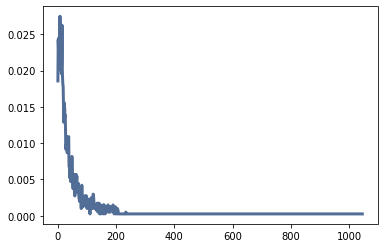

In [46]:
thinkplot.Pdf(pmf_fb, label='Facebook')

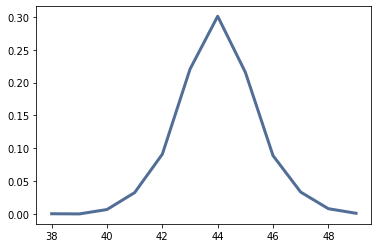

In [47]:
thinkplot.Pdf(pmf_ws, label='WS graph')

## 4.4 Heavy-tailed distributions

In [63]:
pmf_fb_log = Pmf()
for i, j in pmf_fb.Items():
    pmf_fb_log[np.log10(i)] = np.log10(j)

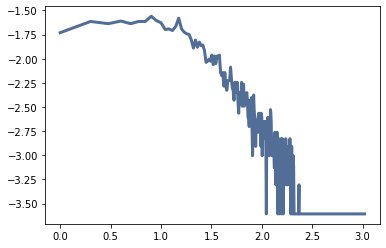

In [70]:
thinkplot.Pdf(pmf_fb_log, label='Facebook')

In [67]:
pmf_ws_log = Pmf()
for i, j in pmf_ws.Items():
    pmf_ws_log[np.log10(i)] = np.log10(j)

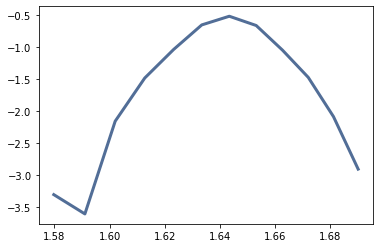

In [68]:
thinkplot.Pdf(pmf_ws_log, label='WS graph')

## 4.5 BA model

In [74]:
ba = nx.barabasi_albert_graph(n=4039, m=22)

In [77]:
n = len(ba)
m = len(ba.edges())
k = round(m/n,1)
m, n, k

(88374, 4039, 21.9)

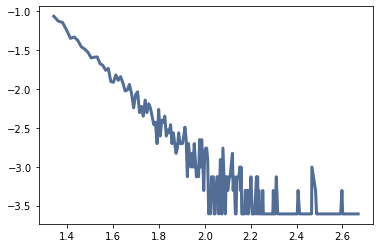

In [82]:
pmf_ba = Pmf(degrees(ba))
pmf_ba_log = Pmf()
for i, j in pmf_ba.Items():
    pmf_ba_log[np.log10(i)] = np.log10(j)
thinkplot.Pdf(pmf_ba_log, label='BA graph')

In [83]:
C, average_clustering(ba)

(0.596, 0.037)

In [84]:
L, estimate_path_lengths(ba)

(3.701, 2.519)

## 4.6 Generating BA graphs

In [85]:
def _random_subset(repeated_nodes, k):
    targets = set()
    while len(targets) < k:
        x = random.choice(repeated_nodes)
        targets.add(x)
    return targets

In [86]:
def barabasi_albert_graph_simple(n, k):
    G = nx.empty_graph(k)
    targets = list(range(k))
    repeated_nodes = []

    for source in range(k, n):
        G.add_edges_from(zip([source] *k, targets))

        repeated_nodes.extend(targets)
        repeated_nodes.extend([source] * k)

        targets = _random_subset(repeated_nodes, k)

    return G

## 4.7 Cumulative distributions

In [88]:
def cumulative_prob(pmf, x):
    ps = [pmf[value] for value in pmf if value <= x]
    return np.sum(ps)

In [89]:
cumulative_prob(pmf_fb, 25)

0.5060658578856152

In [90]:
from thinkstats2 import Cdf
cdf_fb = Cdf(degrees(fb), label='Facebook')

{'xscale': 'linear', 'yscale': 'linear'}

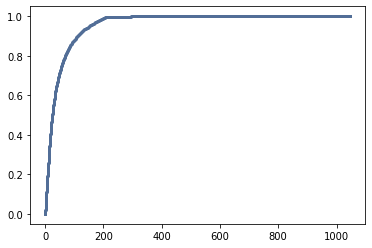

In [91]:
thinkplot.Cdf(cdf_fb)

## 4.8 Explanatory models